In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
modelDF = pd.read_csv(r'modelDF.csv')
modelDF.dtypes

Unnamed: 0                                   int64
gender                                        bool
SeniorCitizen                                 bool
Partner                                       bool
Dependents                                    bool
tenure                                       int64
PhoneService                                  bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes             

In [40]:
modelDF

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,False,False,True,False,1,False,True,29.85,29.85,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,1,True,False,False,False,34,True,False,56.95,1889.50,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,2,True,False,False,False,2,True,True,53.85,108.15,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,3,True,False,False,False,45,False,False,42.30,1840.75,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,4,False,False,False,False,2,True,True,70.70,151.65,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,True,False,True,True,24,True,True,84.80,1990.50,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7039,7039,False,False,True,True,72,True,True,103.20,7362.90,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7040,7040,False,False,True,True,11,False,True,29.60,346.45,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
7041,7041,True,True,True,False,4,True,True,74.40,306.60,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True


In [41]:
#Establish target and features to pass to model
Y = modelDF['Churn'].values
X = modelDF.drop(labels = ['Churn'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
model = LogisticRegression(max_iter=500)
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

0.7977288857345636


PaperlessBilling                           0.458766
Contract_Month-to-month                    0.451686
InternetService_Fiber optic                0.350383
SeniorCitizen                              0.271141
PaymentMethod_Electronic check             0.253880
TechSupport_No                             0.226164
OnlineSecurity_No                          0.204058
MultipleLines_No phone service             0.132606
OnlineBackup_No                            0.118685
StreamingTV_Yes                            0.094768
StreamingMovies_Yes                        0.053478
gender                                     0.040467
DeviceProtection_No                        0.030158
TotalCharges                               0.000430
Partner                                    0.000223
Unnamed: 0                                 0.000004
MonthlyCharges                            -0.003140
MultipleLines_Yes                         -0.042241
DeviceProtection_Yes                      -0.053745
PaymentMetho

In [42]:
#Drop variables with less than 5% correlation
#Note that dummied variables with <5% correlation are left in when the absolute value sum of that 
#variable with its dummy pair is >5%
#Also dropped inter-correlated values dependent on 'InternetService_No'

Z = modelDF.drop(labels = ['Churn',\
                           'Unnamed: 0',\
                           'OnlineBackup_No internet service','OnlineSecurity_No internet service',\
                           'DeviceProtection_No internet service','TechSupport_No internet service',\
                           'StreamingTV_No internet service','StreamingMovies_No internet service',\
                           'MonthlyCharges','TotalCharges','gender','Partner'],\
                 axis = 1)

In [43]:
#rand = randint(0,1000)
Y = modelDF['Churn'].values
Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=101)
model = LogisticRegression(max_iter=1000)
result = model.fit(Z_train, y_train)
prediction_test = model.predict(Z_test)
print (metrics.accuracy_score(y_test, prediction_test))
weights = pd.Series(model.coef_[0],index=Z.columns.values)
weights.sort_values(ascending = False)

0.801277501774308


Contract_Month-to-month                    0.637486
InternetService_Fiber optic                0.581094
PaperlessBilling                           0.416295
StreamingTV_Yes                            0.281348
TechSupport_No                             0.280940
OnlineSecurity_No                          0.280548
PaymentMethod_Electronic check             0.251478
SeniorCitizen                              0.246887
StreamingMovies_Yes                        0.246304
OnlineBackup_No                            0.208140
MultipleLines_No phone service             0.170569
DeviceProtection_Yes                       0.124803
DeviceProtection_No                        0.121507
MultipleLines_Yes                          0.048919
OnlineBackup_Yes                           0.038171
Contract_One year                          0.034247
StreamingMovies_No                         0.000007
PaymentMethod_Mailed check                -0.019488
OnlineSecurity_Yes                        -0.034237
TechSupport_

In [44]:
#Now that significant variables are found and other variables have improved correlation,
#we can play with iterations to see if we can get better results.  Modify the iterations variable below to check,
#and run the weights function below
#We can also seed the train/test split with random integers to introduce variability within train/test splits
#Also, test_size has been implemented as a variable to allow for different train/test split proportions
#Recommend holding random_state at 101 while adjusting other parameters in order for comparison to control models above

iterations = 500
rand = randint(0,1000)
#controlComparison = 101
testsize = 0.2

Y = modelDF['Churn'].values
Z_train, Z_test, y_train, y_test = train_test_split(Z, Y, test_size=testsize, random_state=rand)
model = LogisticRegression(max_iter=iterations)
result = model.fit(Z_train, y_train)
prediction_test = model.predict(Z_test)
print (metrics.accuracy_score(y_test, prediction_test))
weights = pd.Series(model.coef_[0],index=Z.columns.values)
weights.sort_values(ascending = False)

0.8069552874378992


Contract_Month-to-month                    0.666393
InternetService_Fiber optic                0.555877
PaperlessBilling                           0.339427
TechSupport_No                             0.305064
OnlineSecurity_No                          0.289522
StreamingMovies_Yes                        0.284440
StreamingTV_Yes                            0.264092
PaymentMethod_Electronic check             0.252041
OnlineBackup_No                            0.200554
SeniorCitizen                              0.160540
MultipleLines_No phone service             0.140563
DeviceProtection_Yes                       0.130714
DeviceProtection_No                        0.120417
MultipleLines_Yes                          0.094504
OnlineBackup_Yes                           0.050577
StreamingTV_No                            -0.012961
StreamingMovies_No                        -0.033309
tenure                                    -0.033945
OnlineSecurity_Yes                        -0.038391
PaymentMetho

In [45]:
accuracy_score(y_true = y_test, y_pred = prediction_test)
confusion_matrix(y_true = y_test, y_pred = prediction_test)
cm = confusion_matrix(y_true = y_test, y_pred = prediction_test)

Text(0, 0.5, 'Actual')

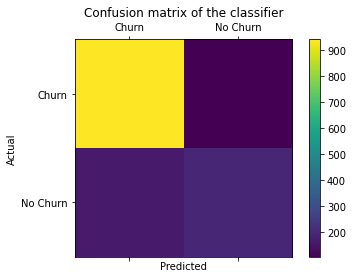

In [46]:
labels = ['Churn','No Churn']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

<AxesSubplot:>

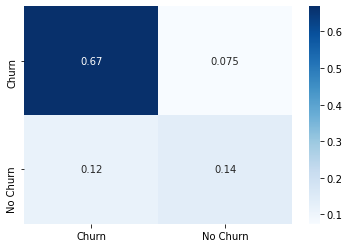

In [47]:
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues',xticklabels=labels,yticklabels=labels)